In [1]:
pip install pandas numpy scikit-learn yfinance


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import yfinance as yf
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [3]:
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

print(data.head())

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.447411  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.458560  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.355827  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.344078  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.386253  447610800


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,51.297746,51.869747,50.731996,51.321186,48.954914,2.562707e+08
std,47.328490,47.938843,46.732224,47.357062,47.326300,2.225648e+08
min,6.870357,7.000000,6.794643,6.858929,5.785829,3.519590e+07
25%,18.966697,19.121697,18.780179,18.967589,16.453291,1.023541e+08
50%,29.756250,29.981250,29.561250,29.815000,27.101382,1.666698e+08
75%,56.983748,57.309999,56.469999,56.777499,54.381585,3.456643e+08
max,182.630005,182.940002,179.119995,182.009995,179.076599,1.880998e+09


In [14]:
rows, columns = data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 3253
Number of columns: 11


In [16]:
data.head(100)

,Open,High,Low,Close,Adj Close,Volume,Return,MA_5,MA_10,MA_20,Volatility
Date,,,,,,,,,,,
2010-02-01,6.870357,7.000000,6.832143,6.954643,5.866569,749876400,0.013902,7.142143,7.269857,7.395214,0.028209
2010-02-02,6.996786,7.011429,6.906429,6.995000,5.900614,698342400,0.005803,7.070143,7.201357,7.362804,0.026783
2010-02-03,6.970357,7.150000,6.943571,7.115357,6.002140,615328000,0.017206,7.008357,7.156714,7.335750,0.028353
2010-02-04,7.026071,7.084643,6.841786,6.858929,5.785829,757652000,-0.036039,6.956643,7.099500,7.301964,0.026866
2010-02-05,6.879643,7.000000,6.816071,6.980714,5.888561,850306800,0.017756,6.980929,7.091321,7.274964,0.022736
...,...,...,...,...,...,...,...,...,...,...,...
2010-06-17,9.664286,9.746429,9.625000,9.709643,8.190545,872855200,0.017287,9.332858,9.130500,9.055072,0.009800
2010-06-18,9.723214,9.821429,9.693571,9.788214,8.256818,784621600,0.008092,9.479714,9.195179,9.119911,0.010389
2010-06-21,9.917500,9.964643,9.597500,9.648929,8.139324,776490400,-0.014230,9.593214,9.263857,9.169643,0.016655


In [5]:
# Create features
data['Return'] = data['Close'].pct_change()
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['Volatility'] = data['Return'].rolling(window=5).std()

# Drop NaN values
data.dropna(inplace=True)

# Define features (X) and target (y)
X = data[['MA_5', 'MA_10', 'MA_20', 'Volatility']]
y = data['Close'].shift(-1)  # Predict the next day's closing price
y.dropna(inplace=True)  # Drop NaN values in target
X = X[:-1]  # Align X with y

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and find R² score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.9986631909505455


In [9]:
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 2.93


In [11]:
predictions = model.predict(X_test)

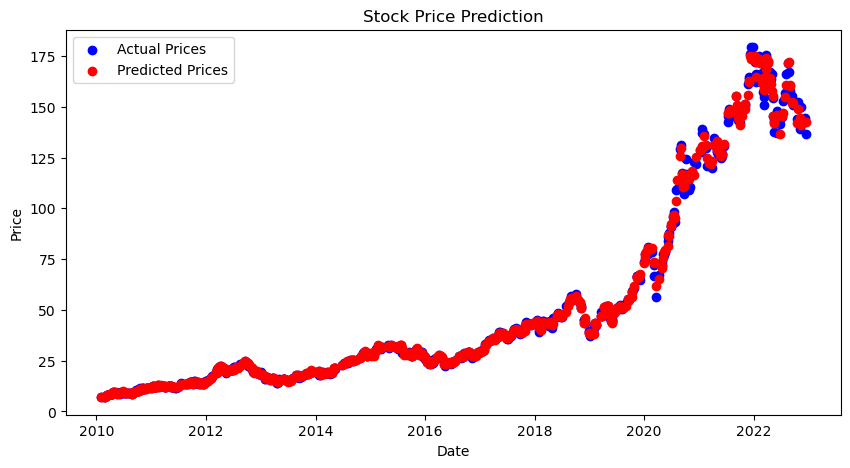

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test.index, y_test, label='Actual Prices', color='blue')
plt.scatter(y_test.index, predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate a sample dataset
X, y = 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (e.g., RandomForest)
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

SyntaxError: invalid syntax (3658981453.py, line 9)